## **Load Dataset & Import Module**

## **stationary**

In [7]:
'''
시계열 : 시간 순서대로 발생한 데이터의 수열을 의미
Y={Yt:t∈T},Where T is the indexset
#  두 가지의 전제
* 과거의 데이터에 일정한 패턴이 발견된다.
* 과거의 패턴은 미래에도 동일하게 반복될 것이다.
 --> 안정적인 데이터에 대해서만 미래 예측이 가능하다. 
'''

# About ARIMA(Auto-Regressive integrated Moving Average)
# Prophet , LSTM etc 

#Load Dataset 
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2020-08-13 02:27:52--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv.1’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.009s  

2020-08-13 02:27:52 (6.85 MB/s) - ‘daily-min-temperatures.csv.1’ saved [67921/67921]

--2020-08-13 02:27:54--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [9]:
dataset_filepath = '/content/daily-min-temperatures.csv'
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [10]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [11]:
ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

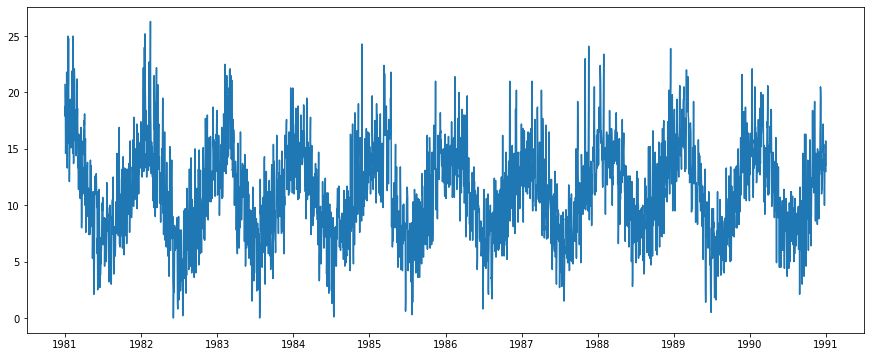

In [12]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [13]:
ts1[ts1.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

In [14]:
# 결측치가 있다면 이를 보강합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')
ts1[ts1.isna()]    # 다시 NaN 확인

Series([], Name: Temp, dtype: float64)

In [15]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


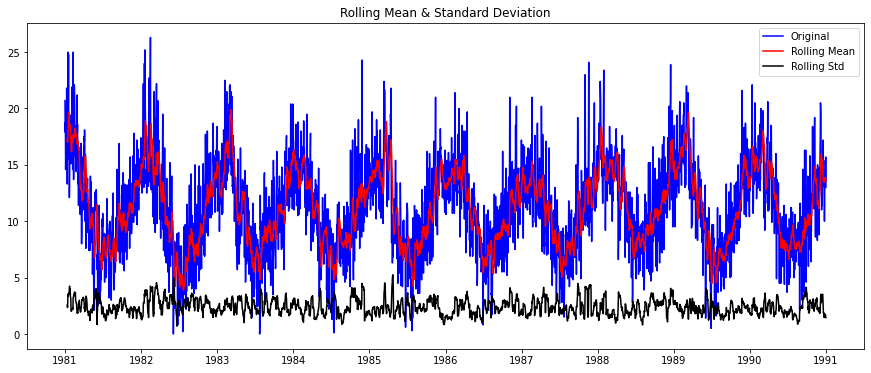

In [16]:
plot_rolling_statistics(ts1, window=12)

In [17]:
dataset_filepath = '/content/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


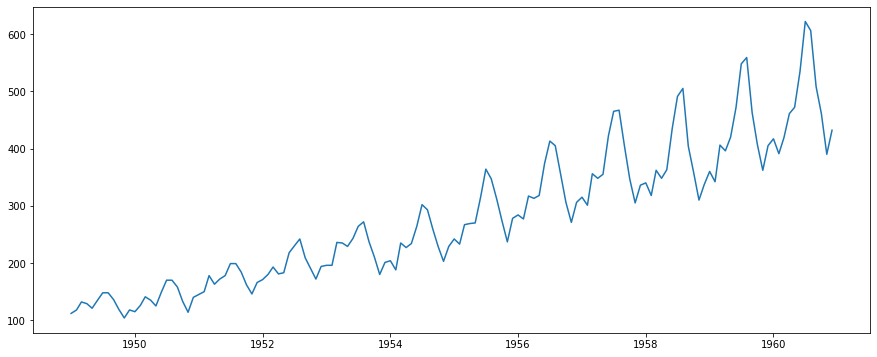

In [18]:
ts2 = df['Passengers']
plt.plot(ts2)

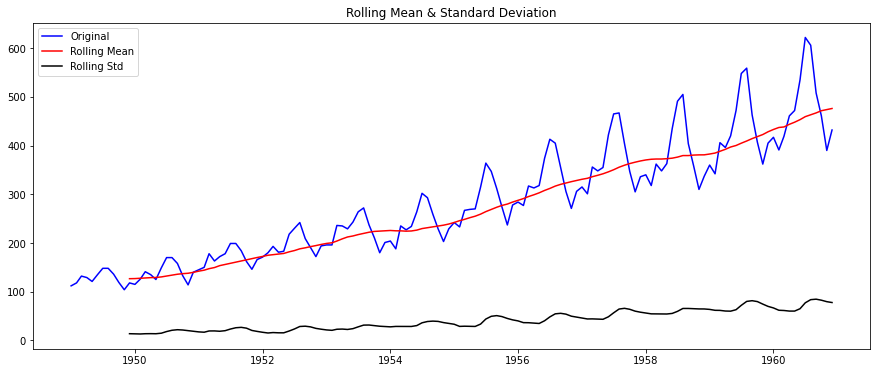

In [19]:
plot_rolling_statistics(ts2, window=12)

# **Non stationary**

In [ ]:
'''
Augmented Dicke-Fuller Test
시계열의 안정성을 테스트하는 통계적 방법

귀무가설 이용 
1.주어진 시계열 데이터가 안정적이지 않다고 가정 
2.기각될 경우, 시계열데이터가 안정적이다라는 대립가설 채택
세부알고리즘 : https://datascienceschool.net/view-notebook/ebb638fc880145b9adeef8dfa630f067/

statsmodels 패키지에서 제공되는 adfuller메소드를 이용해 확인


In [21]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


슝=3


In [22]:
# p-value값이 0에 가깝게 나왔으므로 ts1는 안정적이다고 볼 수 있다. 
augmented_dickey_fuller_test(ts1)


Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [23]:
# p-value값이 1에 가깝게 나왔으므로 ts2는 안정적이 않다고 볼 수 있다.
augmented_dickey_fuller_test(ts2)


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


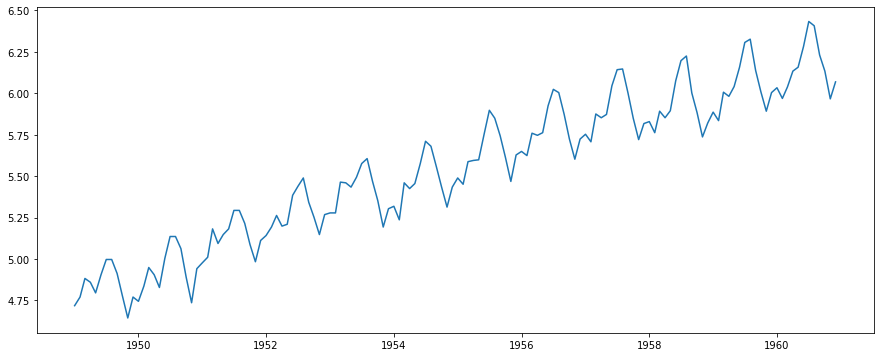

In [24]:
'''
안정적이 않은 시계열데이터를 안정적으로 만들려는 시도
1. stationary한 특성을 가지도록 기존의 시계열 데이터를 가공/변형
2. 시계열 분해 기법을 적용
'''
'''
1번 사항 적용
'''
#Log 변환
ts_log = np.log(ts2)
plt.plot(ts_log)
augmented_dickey_fuller_test(ts_log)

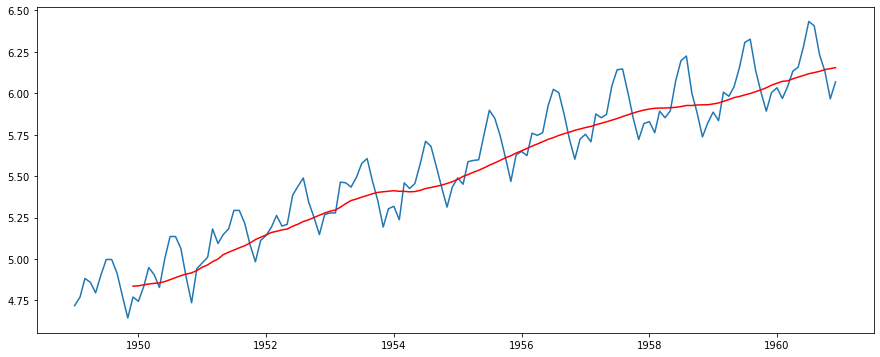

In [25]:
#2. 시간 추이에 따라 평균값 변화량 제거 / rolling mean을 구해서 ts_log빼주기 
moving_avg = ts_log.rolling(window=12).mean()  # moving average를 구해서 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [26]:
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [27]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

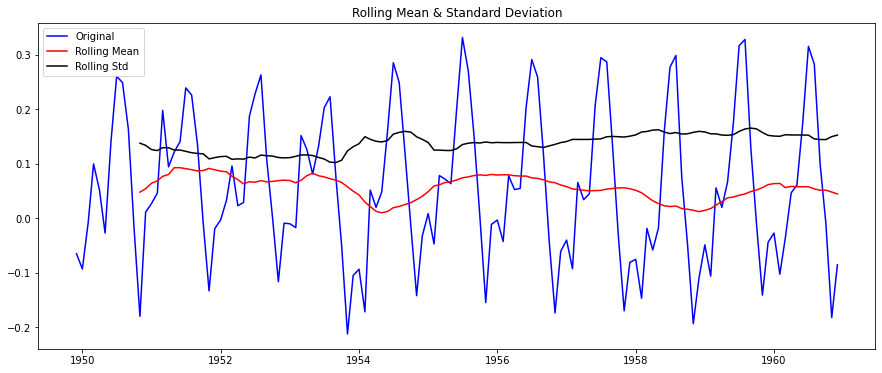

In [28]:
plot_rolling_statistics(ts_log_moving_avg)

In [29]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [30]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


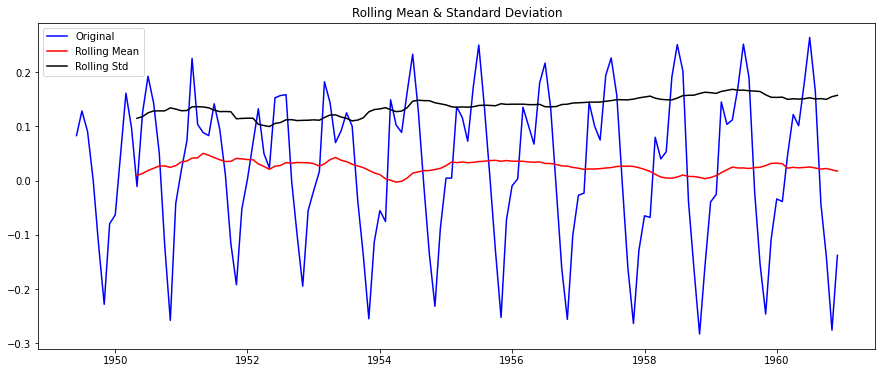

In [31]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [32]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


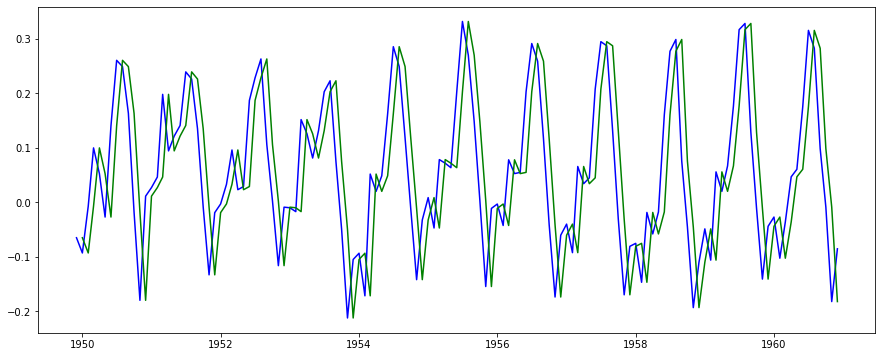

In [33]:
#차분(Differencing) - Seasonality 상쇄하기

ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

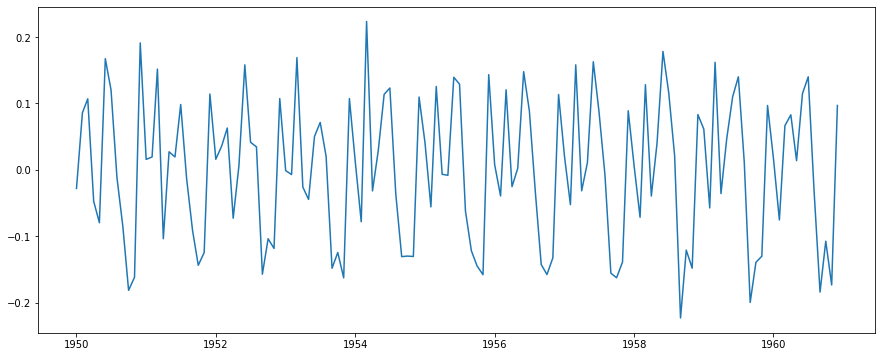

In [34]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

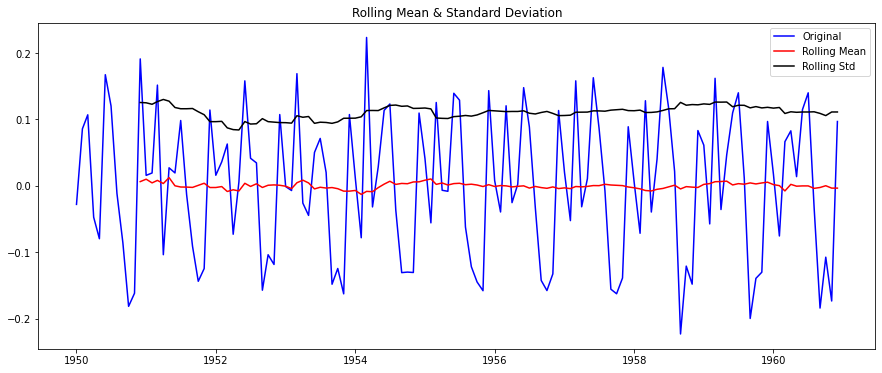

In [35]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [36]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


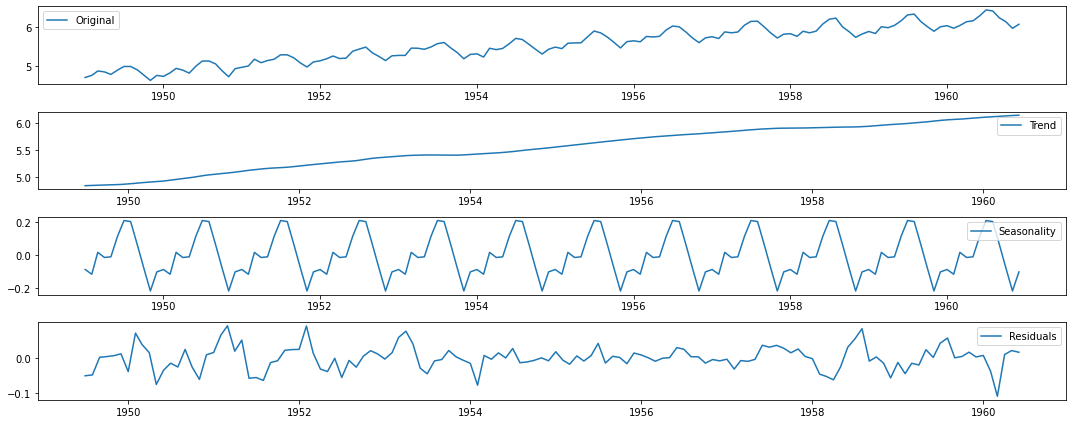

In [37]:
#2. 시계열분해
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

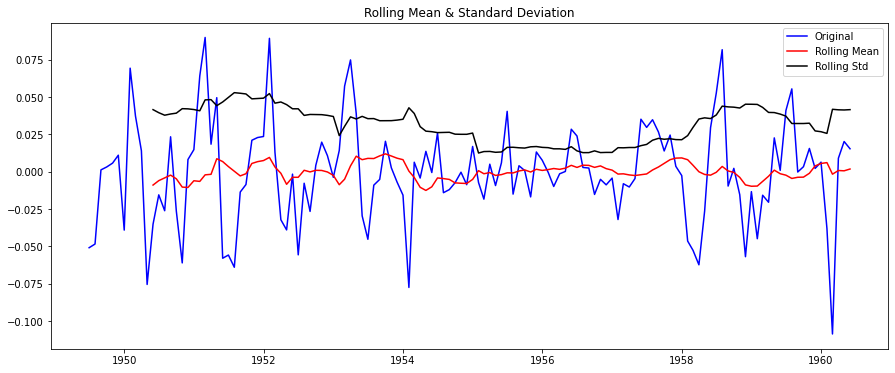

In [38]:
plot_rolling_statistics(residual)

In [39]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
'''


ARIMA 모델의 정의
이전 스텝에서 우리는 시계열 데이터가 Trend와 Seasonality와 Residual로 Decompose되며, Trend와 Seasonality를 효과적으로 분리해 낸 경우 아주 예측력 있는 안정적인 시계열 데이터로 변환 가능하다는 것을 확인하였습니다.

바로 이런 원리를 활용하여 시계열 데이터 예측모델을 자동으로 만들어 주는 모델이 있습니다. 바로 오늘 소개하게 될 ARIMA(Autoregressive Integrated Moving Average)입니다.

ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average)가 합쳐진 모델입니다. 각각의 개념을 하나하나 살펴보면 바로 지금까지 우리가 다루어온 개념들과 닮아 있음을 알게 됩니다.

시계열 데이터 
Y
=
{
Y
t
:
t
∈
T
}
 를 생각해 봅시다. 
Y
t
 를 예측하기 위해서 다음과 같은 모델들을 생각해 볼 수 있습니다.
AR(자기회귀, Autoregressive)

- 자기회귀(AR)란 
Y
t
가 이전 p개의 데이터 
Y
t
−
1
,
Y
t
−
2
,
.
.
.
,
Y
t
−
p
 의 가중합으로 수렴한다고 보는 모델입니다.
- 가중치의 크기가 1보다 작은 
Y
t
−
1
,
Y
t
−
2
,
.
.
.
,
Y
t
−
p
 의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치입니다.
- AR은 일반적인 시계열에서 Trend와 Seasonality를 제거한 Residual에 해당하는 부분을 모델링한다고 볼 수 있습니다.
- 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이라고 볼 수 있습니다.
- MA(이동평균, Moving Average)

- 이동평균(MA)은 
Y
t
가 이전 q개의 예측오차값 
e
t
−
1
,
e
t
−
2
,
.
.
.
,
e
t
−
q
 의 가중합으로 수렴한다고 보는 모델입니다.
- MA는 일반적인 시계열에서 Trend에 해당하는 부분을 모델링한다고 볼 수 있습니다. 예측오차값 
e
t
−
1
이 +라면 모델 예측보다 관측값이 더 높았다는 뜻이므로, 다음 
Y
t
 예측시에는 예측치를 올려잡게 됩니다.
- 주식값은 항상 최근의 증감 패턴이 지속될 것이라고 예측하는 관점이 바로 주식 시계열을 MA로 모델링하는 관점이라고 볼 수 있습니다.
-I (차분누적, Integration)
- 차분누적은 
Y
t
이 이전 데이터와 d차 차분의 누적(integration) 합이라고 보는 모델입니다.
- 예를 들어서 d=1이라면 
Y
t
는 
Y
t
−
1
과 
Δ
Y
t
−
1
 의 합으로 보는 것입니다.
- I는 일반적인 시계열에서 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있습니다.
ARIMA는 위 3가지 모델을 모두 한꺼번에 고려하는 모델입니다. 주식값을 예측하는 우리의 태도와 비슷하지 않나요? 위 그림에서 보듯 어제 주식값이 떨어졌다는 것을 알게 되었을 때, '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와 '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가 동시에 떠오르게 됩니다. ARIMA는 이 두 모델 사이에서 적정 가중치를 찾아가는 훨씬 통합적인 예측 능력을 보여 줍니다.

ARIMA 모델의 모수 p, q, d
ARIMA를 활용해서 시계열 예측 모델을 성공적으로 만들기 위해서는 ARIMA의 모수(parameter)를 데이터에 맞게 설정해야 합니다. 쉽게 말하자면 모델에 아주 핵심적인 숫자들을 잘 설정해야 올바른 예측식을 구할 수 있다는 것이지요.

ARIMA의 모수는 3가지가 있는데, 자기회귀 모형(AR)의 시차를 의미하는 p, 차분(diffdrence) 횟수를 의미하는 d, 이동평균 모형(MA)의 시차를 의미하는 q입니다.

이들 중 p 와 q 에 대해서는 통상적으로 p + q < 2, p * q = 0 인 값들을 사용하는데, 이는 p 나 q 중 하나의 값이 0이라는 뜻입니다. 이렇게 하는 이유는 실제로 대부분의 시계열 데이터는 자기회귀 모형(AR)이나 이동평균 모형(MA) 중 하나의 경향만을 강하게 띠기 때문입니다.

그러면 ARIMA(p,d,q) 모델의 모수를 결정하는 방법은 어떻게 될까요? 예를 들어 q라면 이전 스텝에서 Moving Average를 구할 때의 window=12에 해당하는 값과 같은 역할을 한다는 느낌이 듭니다. 이 값을 어떻게 결정하느냐가 시계열 데이터의 안정성 및 이후 예측성능에 영향을 크게 미칠 것입니다.

여기서부터의 설명이 매우 어렵습니다. ARIMA의 적절한 모수 p,d,q를 선택하기 위한 방법에는 엄청난 통계학적인 다양한 시도들이 있습니다. 통계학적인 설명을 생략하고 결론부터 이야기하자면, 모수 p,d,q는 ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)을 통해 결정할 수 있습니다. 이 AutoCorrelation은 우리가 맨 첫 스텝에서 만났던 바로 개념 중 하나인 자기상관계수와 같은 것입니다.

ACF 는 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수이며, PACF 는 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수입니다.

지난 스텝에서 다루었던 International airline passengers 시계열을 토대로 예시를 들어 설명하겠습니다. 우리는 statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용할 것입니다.

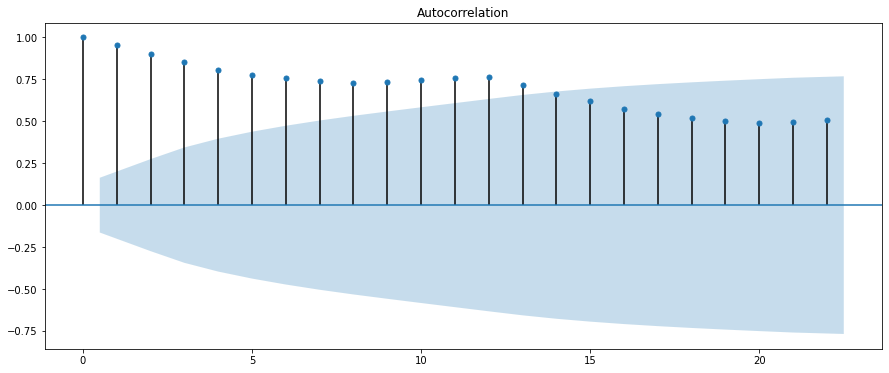

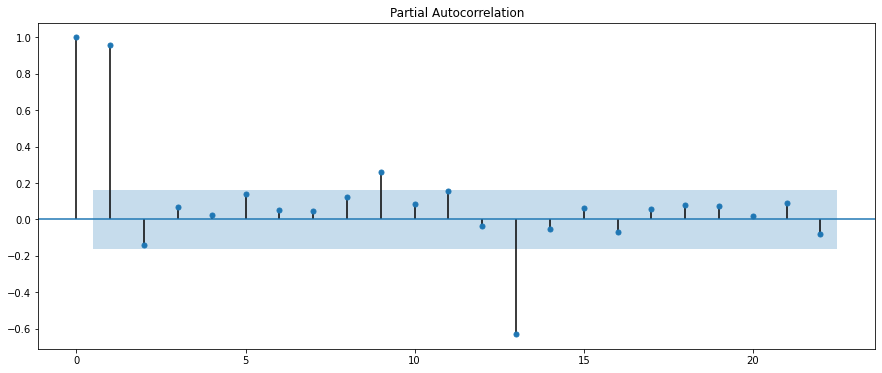

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


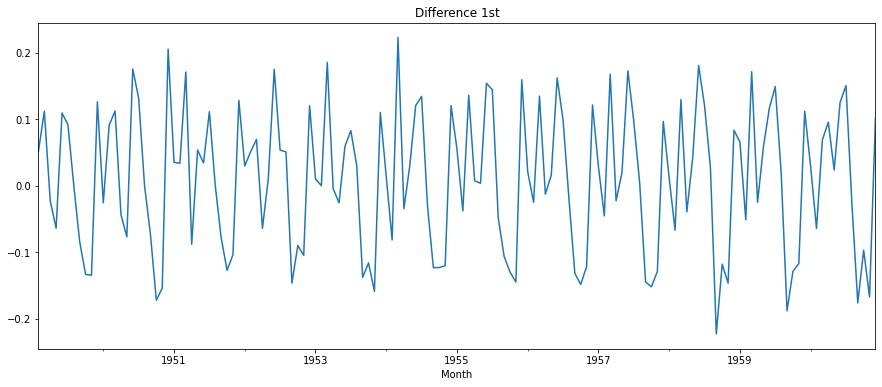

In [41]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


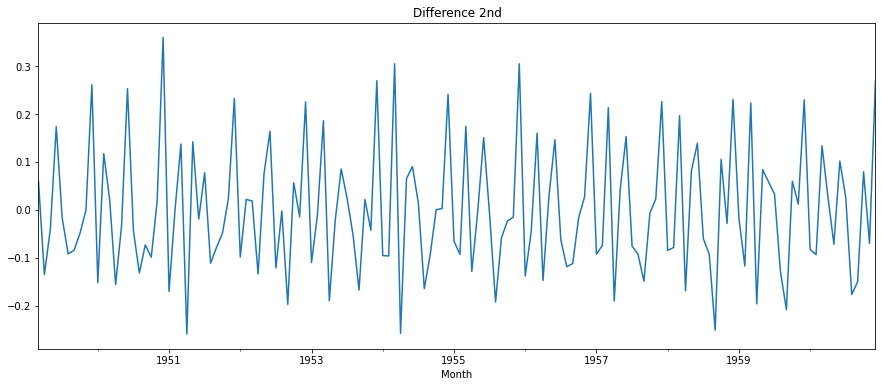

In [48]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

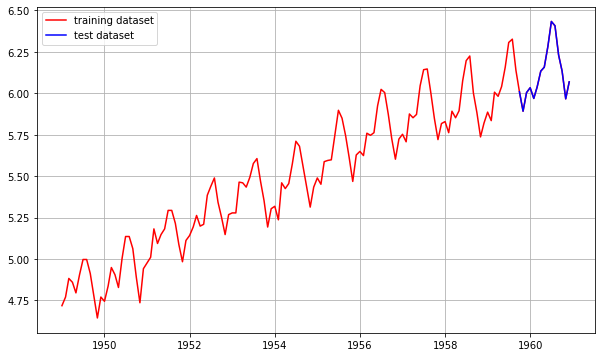

In [42]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [43]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


In [44]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  128
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 108.023
Method:                       css-mle   S.D. of innovations              0.104
Date:                Thu, 13 Aug 2020   AIC                           -210.046
Time:                        04:51:44   BIC                           -201.490
Sample:                    02-01-1949   HQIC                          -206.570
                         - 09-01-1959                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0108      0.011      0.972      0.333      -0.011       0.033
ar.L1.D.Passengers     0.1754      0.088      1.994      0.048       0.003       0.348
                    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


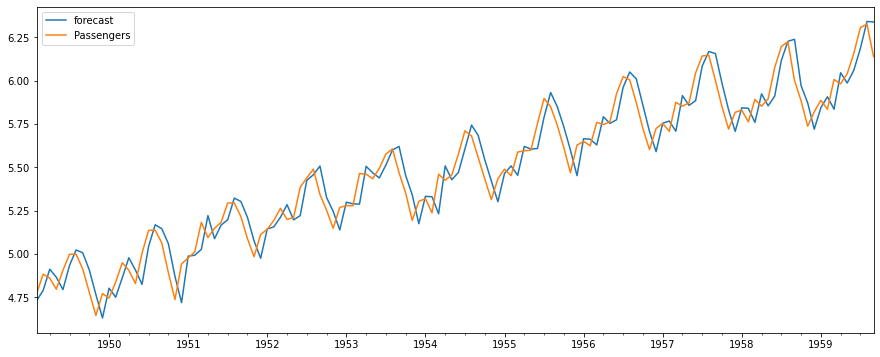

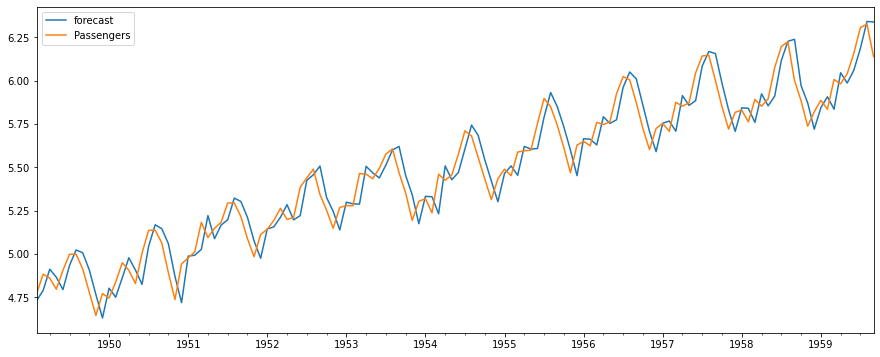

In [45]:
fitted_m.plot_predict()

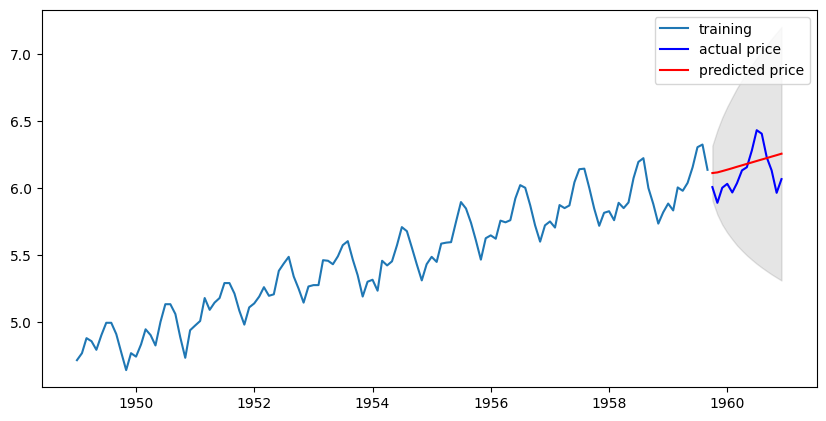

In [46]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  5409.549795869427
MAE:  63.13692098315175
RMSE:  73.54964171136
MAPE: 14.08%
